*First compiled: October 3rd, 2017.*

# Concept figures for graph abstraction

In [1]:
import matplotlib.pyplot as pl
from matplotlib import rcParams
import networkx as nx
import sklearn as sk
import sklearn.datasets
import pandas as pd
import numpy as np
import scanpy.api as sc
sc.settings.verbosity = 1
sc.settings.set_figure_params(dpi=120)
sc.logging.print_version_and_date()

Running Scanpy version 0.2.8+20.ga17e9f4.dirty on 2017-10-04 06:37.


In [38]:
sc.settings.file_format_figs = 'pdf'

In [39]:
sc.pl.reset_rcParams()

In [40]:
adata = sc.read('AGA_concept_dataset.csv')

reading AGA_concept_dataset.csv


In [41]:
adata = adata[:-1]

In [42]:
adata.X -= np.min(adata.X, axis=0)

In [43]:
adata.add['iroot'] = 9

In [44]:
sc.tl.aga(adata, n_neighbors=5, resolution=0.6)

In [45]:
# adata.smp['X_tsne'] = adata.X  # hack
# ax = sc.pl.aga(adata, color='aga_groups', groups_graph='aga_groups', size=60)

## The single-cell graph with edges visible

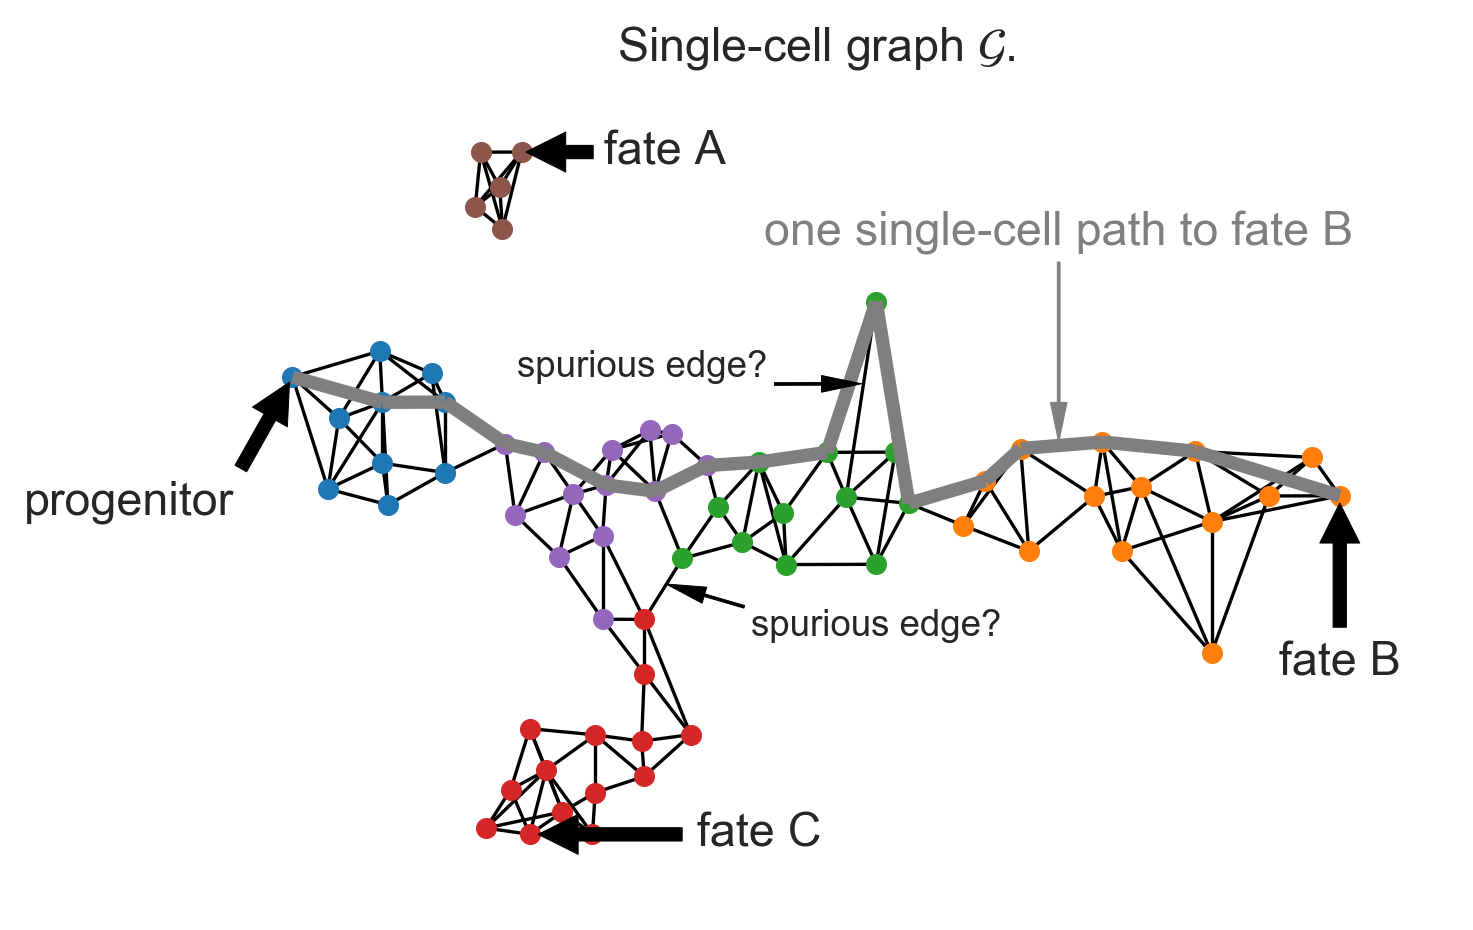

In [68]:
pos = adata.X
adj = adata.add['data_graph_norm_weights']
g = nx.Graph(adj)
rcParams['figure.figsize'] = (6, 4)
nx.draw_networkx_edges(g, pos)
groups = adata.smp['aga_groups']
for igroup, group in enumerate(adata.add['aga_groups_order']):
    pl.scatter(pos[group==groups , 0], pos[group==groups, 1], c=sc.pl.palettes.vega_20_scanpy[igroup])
ax = pl.gca()
ax.set_frame_on(False)
pl.xticks([])
pl.yticks([])
pl.title('Single-cell graph $\mathcal{G}$.')
idx = idx_root= np.argmin(pos[:, 0])
pl.annotate(xy = pos[idx], xytext=pos[idx]-[0.2, 0.3], s='progenitor', ha='right', va='center',
            arrowprops=dict(facecolor='black', shrink=0.05))
idx = idx_fate2 = np.argmax(pos[:, 0])
pl.annotate(xy = pos[idx], xytext=pos[idx]+[0, -0.4], s='fate B', ha='center', va='center',
            arrowprops=dict(facecolor='black', shrink=0.05))
idx = np.argmax(pos[:, 1])
pl.annotate(xy = pos[idx], xytext=pos[idx]+[0.7, 0], s='fate A', ha='right', va='center',
            arrowprops=dict(facecolor='black', shrink=0.05))
idx = idx_fate3 = np.argmin(pos[:, 1])
pl.annotate(xy = pos[idx], xytext=pos[idx]+[1, 0], s='fate C', ha='right', va='center',
            arrowprops=dict(facecolor='black', shrink=0.05))

path = nx.shortest_path(g, source=idx_root, target=idx_fate2)
idx = path[-3]
nx.draw_networkx_edges(g.subgraph(path), pos, width=4, edge_color='#7f7f7f', style='solid')
pl.annotate(xy=pos[idx]+[-0.15, -0.001], xytext=pos[idx]+[-0.15, 0.5],
            s='one single-cell path to fate B', ha='center', va='center', color='#7f7f7f',
            arrowprops=dict(color='#7f7f7f', width=0.8, headwidth=5))

pl.annotate(xy=[1.28, 0.6], xytext=[2, 0.5], fontsize=11,
            s='spurious edge?', ha='center', va='center', 
            arrowprops=dict(color='black', width=0.8, headwidth=5))

pl.annotate(xy=[1.95, 1.08], xytext=[1.2, 1.12], fontsize=11,
            s='spurious edge?', ha='center', va='center', 
            arrowprops=dict(color='black', width=0.8, headwidth=5))

pl.subplots_adjust(right=1, left=0.12, bottom=0.05)
pl.savefig('./figures/single_cell_graph.pdf')
pl.show()

## The abstracted graph

In [11]:
sc.pl.reset_rcParams(fontsize=18)

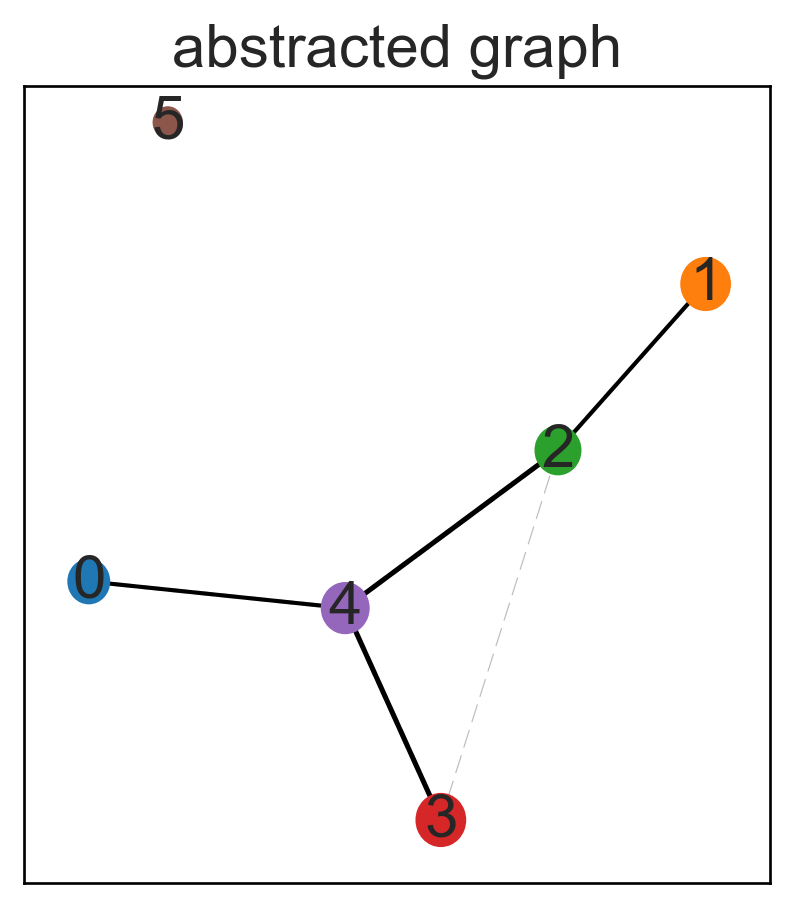

In [12]:
ax, pos_abstraced = sc.pl.aga_graph(adata, return_pos=True, groups='aga_groups')
pos_new = pos_abstraced
pos_new[5] = [-0.92, 5.5]

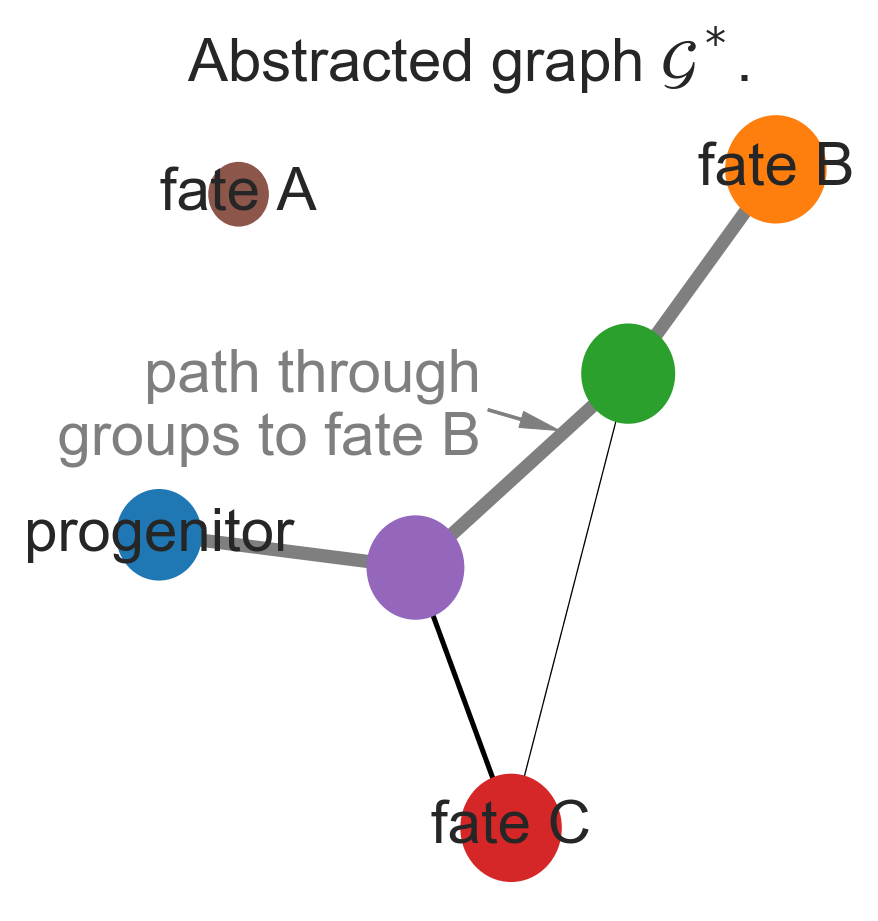

In [22]:
# give some new names
adata.add['aga_groups_order'] = ['progenitor', 'fate B', '', 'fate C', '', 'fate A']
ax = sc.pl.aga_graph(adata, pos=pos_new, frameon=False, title='Abstracted graph $\mathcal{G}^*$.', groups='aga_groups',
                     node_size_scale=2,
                     solid_edges='aga_adjacency_full_confidence', show=False) 
g_abstracted = nx.Graph(adata.add['aga_adjacency_full_attachedness'])
path = nx.shortest_path(g_abstracted, source=0, target=1)
idx = path[-2]
nx.draw_networkx_edges(g_abstracted.subgraph(path), pos_new, width=4, edge_color='#7f7f7f', style='solid', ax=ax)
ax.annotate(xy=pos_new[idx]+[-0.7, -0.5], xytext=pos_new[idx]+[-1.5, -0.3],
            s='path through\n groups to fate B', ha='right', va='center', color='#7f7f7f',
            arrowprops=dict(color='#7f7f7f', width=0.8, headwidth=5))
pl.subplots_adjust(left=0.5, right=1)
pl.savefig('./figures/abstracted_graph.pdf')
pl.show()

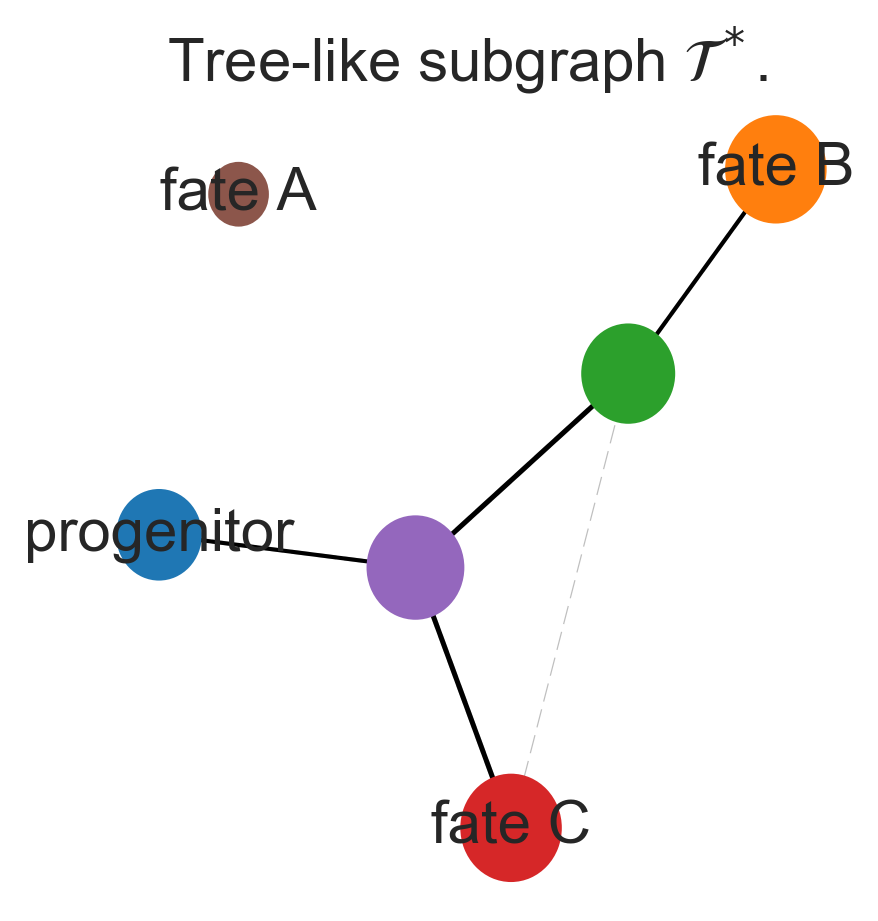

In [14]:
# give some new names
adata.add['aga_groups_order'] = ['progenitor', 'fate B', '', 'fate C', '', 'fate A']
ax = sc.pl.aga_graph(adata, pos=pos_new, frameon=False, title='Tree-like subgraph $\mathcal{T}^*$.', 
                     groups='aga_groups',
                     node_size_scale=2,
                     show=False) 
pl.subplots_adjust(left=0.5, right=1)
pl.savefig('./figures/abstracted_graph_tree.pdf')
pl.show()

In [15]:
sc.write('concept', adata)

writing ./write/concept.h5


## The paths

In [16]:
adata = sc.read('concept')

reading ./write/concept.h5


In [34]:
rcParams['figure.subplot.bottom'] = 0.46
rcParams['figure.subplot.right'] = 0.88

[0, 4, 2, 1]
saving figure to file ./figures/aga_path.pdf


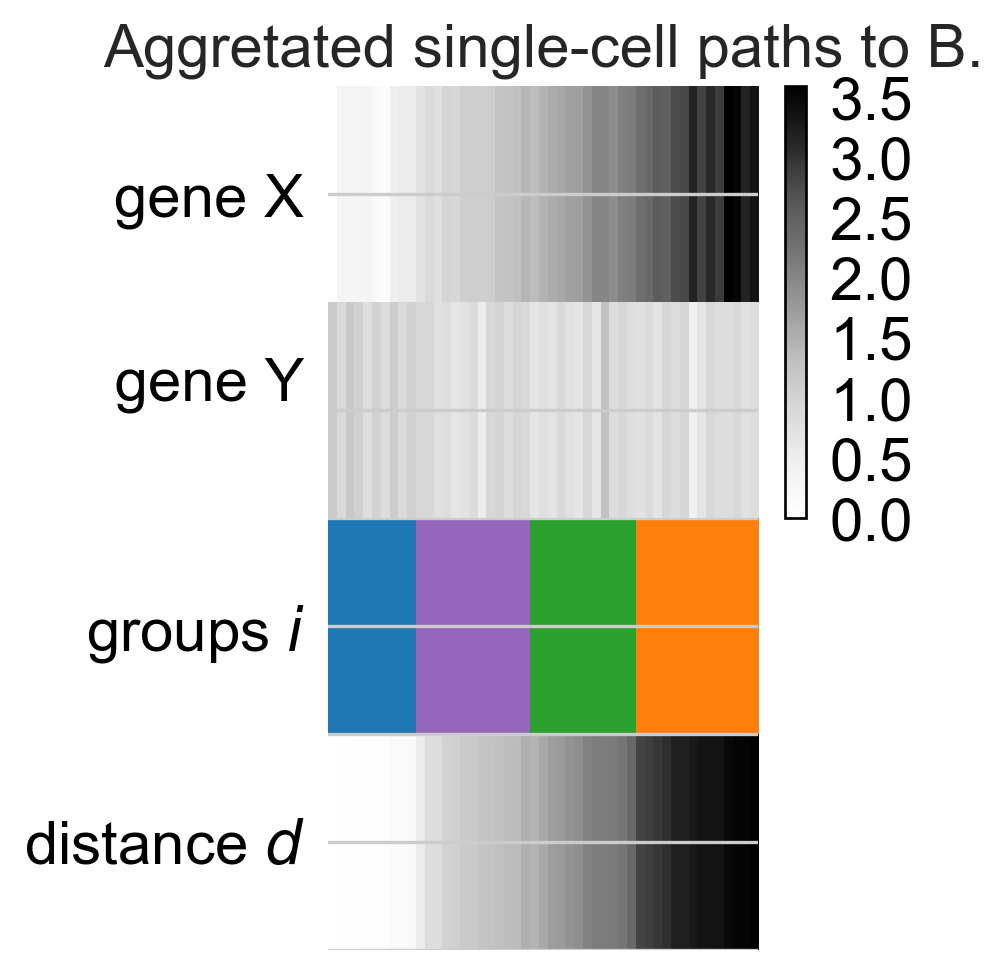

In [35]:
g_abstracted = nx.Graph(adata.add['aga_adjacency_full_attachedness'])
path = nx.shortest_path(g_abstracted, source=0, target=1)
print(path)
ax, groups = sc.pl.aga_path(adata, keys=adata.var_names, nodes=path, left_margin=0.32, color_map_pseudotime='Greys',
                            title='Aggretated single-cell paths to B.', save=True)

saving figure to file ./figures/aga_path_fateC.pdf


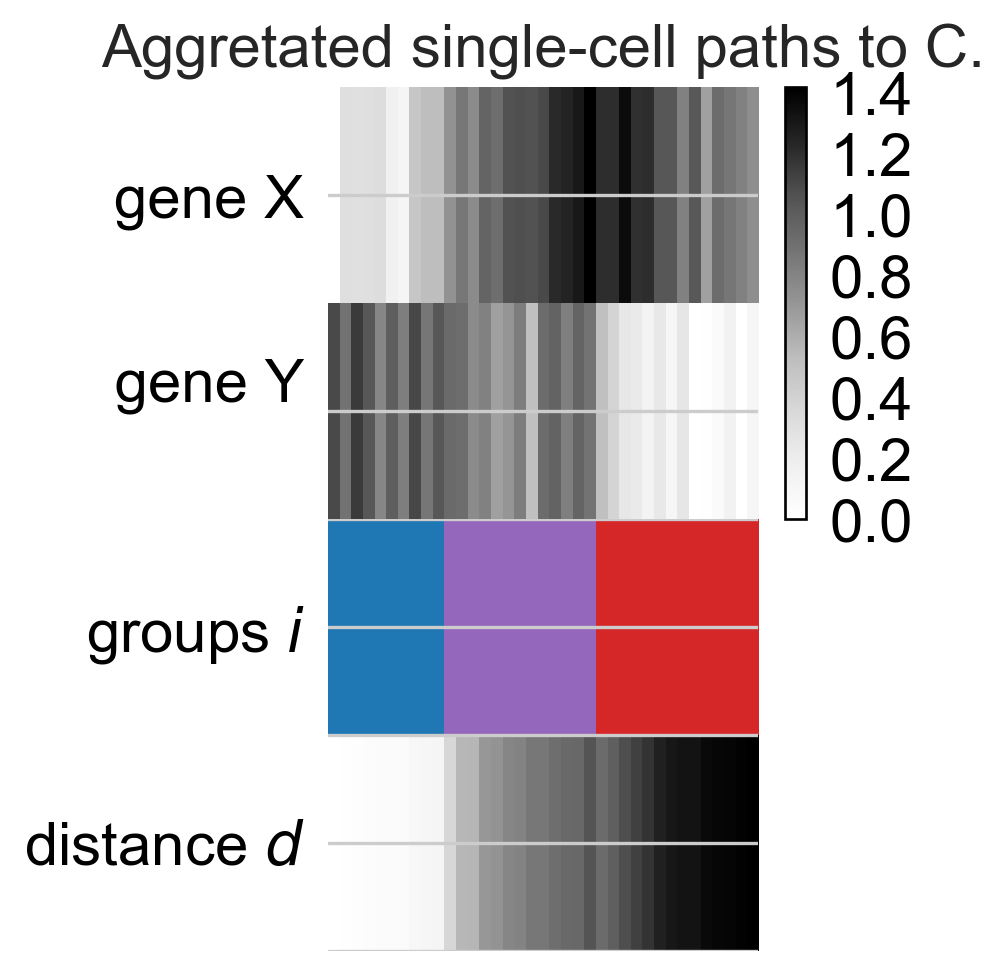

In [36]:
g_abstracted = nx.Graph(adata.add['aga_adjacency_full_attachedness'])
ax, groups = sc.pl.aga_path(adata, keys=adata.var_names, nodes=[0, 4, 3], left_margin=0.32,
                            color_map_pseudotime='Greys',
                            title='Aggretated single-cell paths to C.', save='_fateC')